In [7]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.offline as pyo

pio.renderers.default = 'notebook'
pyo.init_notebook_mode(connected=True)

In [ ]:
# 读取统计数据
df = pd.read_csv('../temp/benchmark_stats.csv')

# 过滤平均值的数据
df = df[df['Epoch'] == 'average']


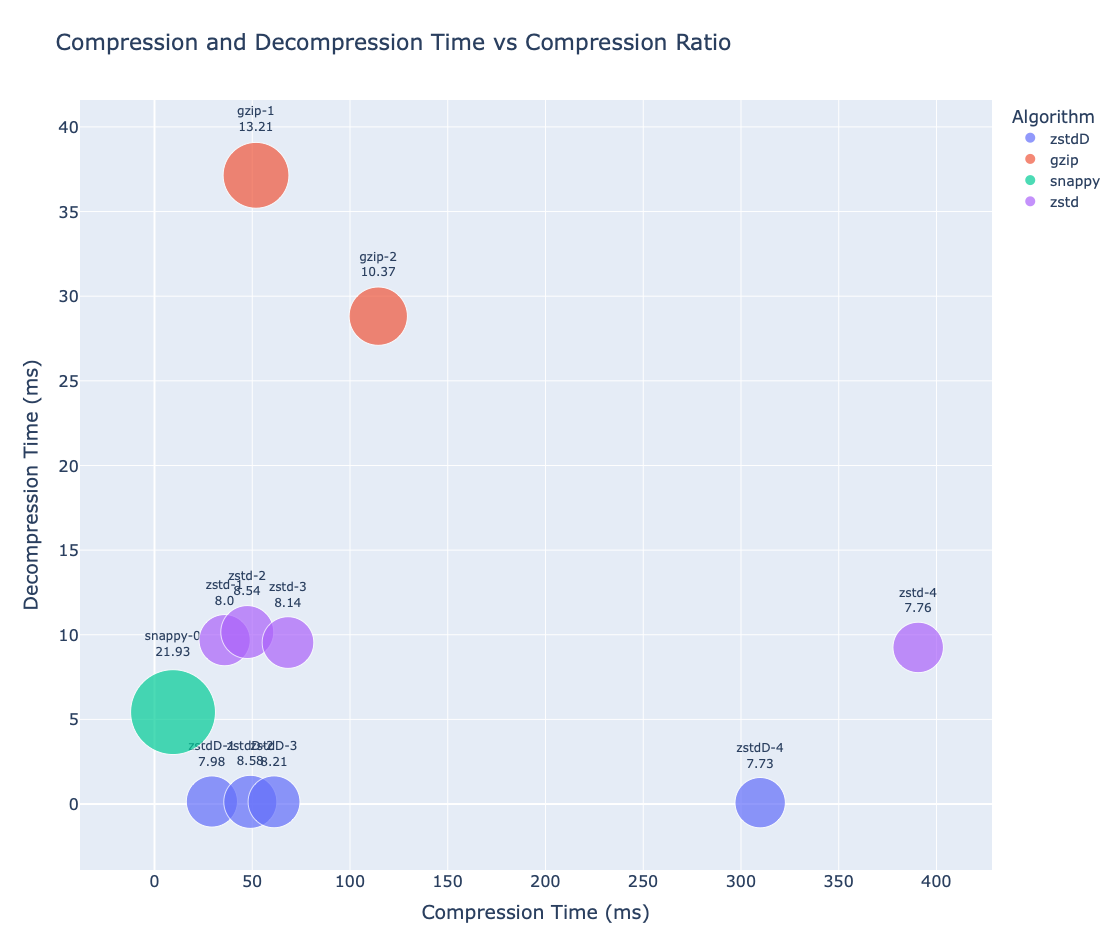

In [21]:


# 将数值列转换为浮点型
df['CompressionTime(ms)'] = df['CompressionTime(ms)'].astype(float)
df['DecompressionTime(ms)'] = df['DecompressionTime(ms)'].astype(float)
df['CompressionRatio(%)'] = df['CompressionRatio(%)'].astype(float)

# 创建一个新的列，将 Algorithm 和 Level 合并，作为标签
df['Algorithm_Level'] = df['Algorithm'] + '-' + df['Level'].astype(str)
df['BubbleLabel'] = (
    df['Algorithm_Level'] + '<br>' + df['CompressionRatio(%)'].round(2).astype(str)
)
# 使用 Plotly 绘制交互式气泡图，添加文本标签
fig = px.scatter(
    df,
    x='CompressionTime(ms)',
    y='DecompressionTime(ms)',
    size='CompressionRatio(%)',
    color='Algorithm',
    text='BubbleLabel',  # 在气泡上显示算法和级别
    hover_name='Algorithm_Level',
    hover_data={
        'CompressionTime(ms)': ':.2f',
        'DecompressionTime(ms)': ':.2f',
        'CompressionRatio(%)': ':.2f',
        'Level': True,
        'Algorithm': False,  # 不重复显示 Algorithm，因为 hover_name 已经包含
    },
    size_max=60,
    title='Compression and Decompression Time vs Compression Ratio',
    labels={
        'CompressionTime(ms)': 'Compression Time (ms)',
        'DecompressionTime(ms)': 'Decompression Time (ms)',
        'CompressionRatio(%)': 'Compression Ratio (%)',
        'Algorithm_Level': 'Algorithm and Level',
    }
)

# 更新布局和文本标签位置
fig.update_traces(
    textposition='top center',  # 调整标签位置
    textfont_size=12,           # 调整标签字体大小
)

fig.update_layout(
    xaxis_title='Compression Time (ms)',
    yaxis_title='Decompression Time (ms)',
    legend_title='Algorithm',
    hovermode='closest',
    autosize=False,
    width=1800,  # 根据需要调整宽度
    height=950,  # 根据需要调整高度
    font=dict(
        size=16,  # 设置全局字体大小
    ),
    legend=dict(
        font=dict(
            size=14  # 设置图例字体大小
        )
    ),
)

# 显示图表，启用全屏按钮
fig.show(config={'displayModeBar': True})
# fig.show()

In [22]:
fig.write_html('benchmark_interactive.html')
